
PCA Weights (2D):
                                    PC1       PC2
Salt (molecular weight g/mol)  0.666050 -0.100553
Nature (valency)               0.650556 -0.201809
Concentration                 -0.211555  0.292837
Height                        -0.251330 -0.573039
Material_encoded               0.158848  0.731461

Magnitude of PCA weights for each principal component: [1. 1.]


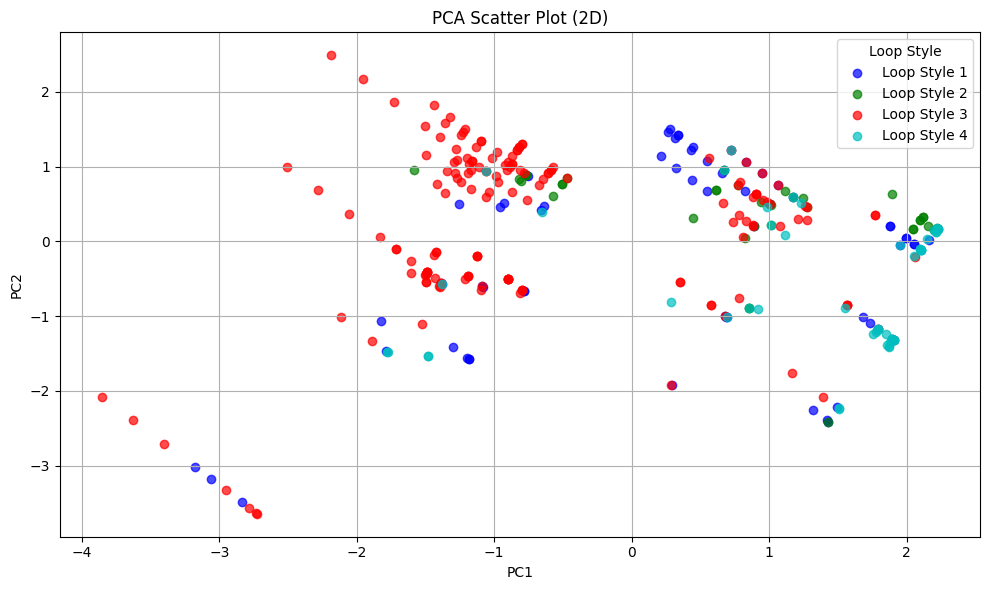

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 5.1 MB/s eta 0:00:00
PCA results and weights have been saved to PCA_Results_2D.xlsx


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# loading dataset woith below command:
file_path = "Dataset.csv"
data = pd.read_csv(file_path)

# Drop unnecessary columns
data = data.drop(columns=['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'])

# Encoding 'Material' column (to make it numerical)
label_encoder = LabelEncoder()
data['Material_encoded'] = label_encoder.fit_transform(data['Material'])

# Define features
features = ['Salt (molecular weight g/mol)', 'Nature (valency)', 'Concentration', 'Height', 'Material_encoded']

# To standerize features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# Doing PCA (2D projection)
pca = PCA(n_components=2)
pca_result_2d = pca.fit_transform(data_scaled)

# To show PCA analysis
pca_weights_2d = pd.DataFrame(pca.components_.T, index=features, columns=['PC1', 'PC2'])
print("\nPCA Weights (2D):")
print(pca_weights_2d)

# To calculate magnitude of weights (should be 1 ideally)
magnitude = np.linalg.norm(pca_weights_2d.values, axis=0)
print("\nMagnitude of PCA weights for each principal component:", magnitude)

# For plotting 2D PCA (scatter plot)
loop_style_values = data['Loop Style'].values
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Add more if needed
plt.figure(figsize=(10, 6))
unique_loop_styles = np.unique(loop_style_values)

for idx, loop_style in enumerate(unique_loop_styles):
    subset = pca_result_2d[loop_style_values == loop_style]
    plt.scatter(subset[:, 0], subset[:, 1], label=f"Loop Style {loop_style}",
                alpha=0.7, color=colors[idx % len(colors)], marker='o')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot (2D)')
plt.legend(title="Loop Style")
plt.grid(True)
plt.tight_layout()
plt.show()

# To save PCA (in excel)
pca_results_df = pd.DataFrame(pca_result_2d, columns=['PC1', 'PC2'])
pca_results_df['Loop Style'] = loop_style_values


!pip install XlsxWriter

output_file = "PCA_Results_2D.xlsx"
with pd.ExcelWriter(output_file, engine='xlsxwriter') as writer:
    pca_weights_2d.to_excel(writer, sheet_name='PCA Weights 2D', index=True)
    pca_results_df.to_excel(writer, sheet_name='PCA Results 2D', index=False)

print(f"PCA results and weights have been saved to {output_file}")